### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [3]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [4]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [5]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [6]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [7]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([0.6544, 0.2106, 0.8424, 0.7176], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([ 0.2153, -0.1845, -0.1827, -0.0083], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([ 0.0116, -0.3943, -0.5119, -0.1312], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [8]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [9]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print()

Passo 0
h = torch.Size([8, 4])

Passo 1
h = torch.Size([8, 4])

Passo 2
h = torch.Size([8, 4])



### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [10]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

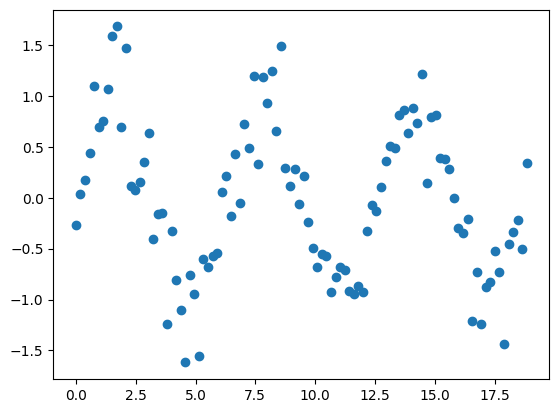

In [11]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [12]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-12-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [13]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [14]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [15]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.722943127155304
Epoch 50, Loss: 0.10441100597381592
Epoch 100, Loss: 0.07939692586660385
Epoch 150, Loss: 0.0726354569196701
Epoch 200, Loss: 0.06123713403940201
Epoch 250, Loss: 0.05721079185605049
Epoch 300, Loss: 0.05294480919837952
Epoch 350, Loss: 0.051048051565885544
Epoch 400, Loss: 0.04815886169672012
Epoch 450, Loss: 0.042947813868522644


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

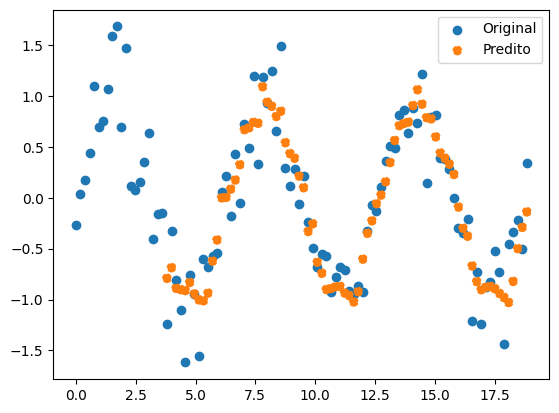

In [16]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**



### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

In [17]:
# parametros
input_size = 1
hidden_size = 32
output_size = 1

# criacao da rede
rnn_ex1 = RNN(input_size, hidden_size, output_size)

In [18]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_ex1.parameters(), lr=0.01)

# loop de treino
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn_ex1(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.37368330359458923
Epoch 50, Loss: 0.04898054152727127
Epoch 100, Loss: 0.01372066605836153
Epoch 150, Loss: 0.002188033889979124
Epoch 200, Loss: 0.00011722966155502945
Epoch 250, Loss: 6.137380296422634e-06
Epoch 300, Loss: 0.0003085380303673446
Epoch 350, Loss: 6.750595730409259e-06
Epoch 400, Loss: 1.1141580813500696e-07
Epoch 450, Loss: 2.527033915455945e-09


In [19]:
# metodo para gerar os plots de acordo com o modelo
def predict_wave(rnn_model, x_data=x, y_data=y,
                 num_points=100, sequence_length=20):
  predicted_wave = []

  input_seq = y_data[:sequence_length].reshape(1, sequence_length, 1)
  input_seq = torch.tensor(input_seq, dtype=torch.float32)

  for _ in range(num_points - sequence_length):
      predicted_next = rnn_model(input_seq)
      predicted_wave.append(predicted_next.item())

      # Arrasta a janela de entrada
      predicted_next = predicted_next.view(1, 1, 1)
      input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1)

  # Plota a senoide original e a predição
  plt.scatter(x_data, y_data, label='Original')
  plt.scatter(x_data[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
  plt.legend()
  plt.show()

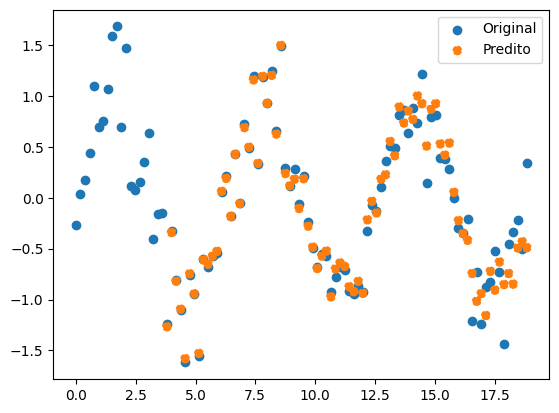

In [20]:
predict_wave(rnn_ex1)

Com o aumento do número de estados ocultos, a loss do modelo diminui bastante, o que significa que os resultados foram mais próximos aos valores reais dos dados. Este fato também pode ser constatado pelo plot das predições, onde mostra um comportamento muito semelhante dos das previsões e reais.

### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?



In [113]:
# definir novo x e y
num_points = 100
x_new = np.linspace(1, 8*np.pi, num_points)
y_new = np.sin(x_new) + np.random.normal(0, 0.3, num_points)

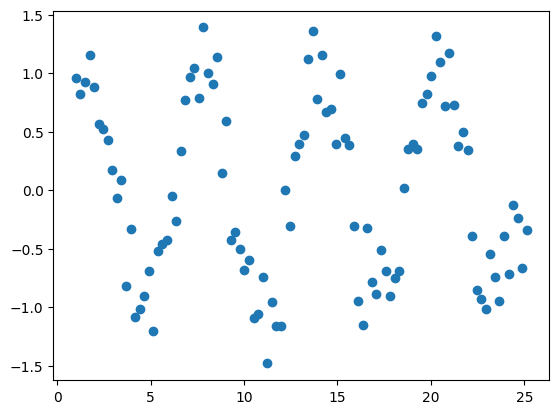

In [114]:
# plot da nova sequencia
plt.scatter(x_new, y_new)
plt.show()

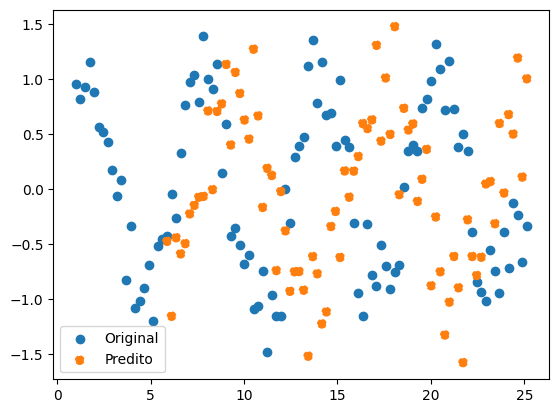

In [115]:
predict_wave(rnn_ex1, x_data=x_new, y_data=y_new, sequence_length=20)

Como a sequencia inicial mudou, é notório o comportamento "deslocado" das predições.

O que mostra que o modelo não se adaptou bem para novos dados.

In [116]:
# criando rnn com multiplas camadas
class RNN_MultipleLayers(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        self.rnn_cells = nn.ModuleList([
            RNNCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)]
        )
        self.W_ho = nn.Linear(hidden_size, output_size)

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]

        # Processa a sequência
        for i in range(seq_len):
            input_ = x[:, i]
            for layer_num in range(self.num_layers):
                h[layer_num] = self.rnn_cells[layer_num](input_, h[layer_num])
                input_ = h[layer_num]

        # Calcula a saída para o ultimo h
        output_h = h[-1]
        y = self.W_ho(output_h)
        return y

In [117]:
# parametros
input_size = 1
hidden_size = 32
output_size = 1

# criacao da rede
rnn_ex2 = RNN_MultipleLayers(input_size, hidden_size, output_size, num_layers=5)

In [123]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs_new = []
targets_new = []

# preparacao dos dados
for i in range(num_points - sequence_length):
    inputs_new.append(y_new[i:i+sequence_length])
    targets_new.append(y_new[i+sequence_length])

inputs_new = torch.tensor(inputs_new, dtype=torch.float32).unsqueeze(-1)
targets_new = torch.tensor(targets_new, dtype=torch.float32).unsqueeze(-1)

In [137]:
# metodo para treinamento de rnn
def train_rnn(rnn_model, inputs, targets):
  criterion = nn.MSELoss()
  optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

  num_epochs = 500
  for epoch in range(num_epochs):
      optimizer.zero_grad()

      predictions = rnn_model(inputs)
      loss = criterion(predictions, targets)
      loss.backward()
      optimizer.step()

      if epoch % 50 == 0:
          print(f'Epoch {epoch}, Loss: {loss.item()}')
  return rnn_model

In [125]:
# treinando rnn como mais hidden states
rnn_ex2 = train_rnn(rnn_ex2, inputs_new, targets_new)

Epoch 0, Loss: 0.5586293339729309
Epoch 50, Loss: 0.04299601539969444
Epoch 100, Loss: 0.0015228583943098783
Epoch 150, Loss: 0.0002129546774085611
Epoch 200, Loss: 1.616875670151785e-05
Epoch 250, Loss: 6.8802905595077846e-09
Epoch 300, Loss: 2.763202076039306e-07
Epoch 350, Loss: 0.00011392911983421072
Epoch 400, Loss: 4.361439494005026e-07
Epoch 450, Loss: 2.14430695422152e-09


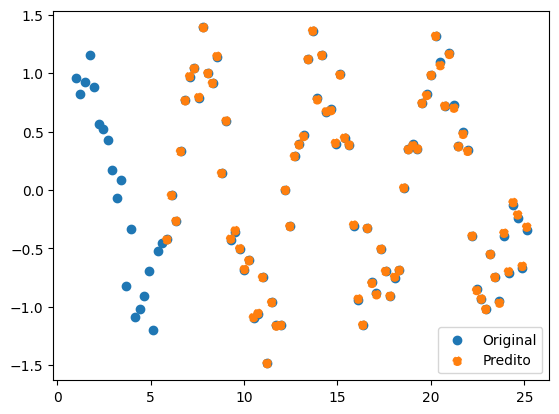

In [126]:
predict_wave(rnn_ex2, x_data=x_new, y_data=y_new, sequence_length=20)

Com mais camadas, o modelo se adapta muito bem aos dados iniciais. A medida que os dados vão se afastando da sequência inicial, há uma pequena defasagem da informação. Sendo assim, quanto mais longe da entrada inicial, mais difícil é prever a saída.

### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

In [129]:
# definir x e y
num_points = 100
sequence_length = 20
batch_size = num_points - sequence_length

x_ex3 = np.linspace(0, 6*np.pi, num_points)

# aumentando o ruido gaussiano
y_ex3 = np.sin(x_ex3) + np.random.normal(0, 0.7, num_points)

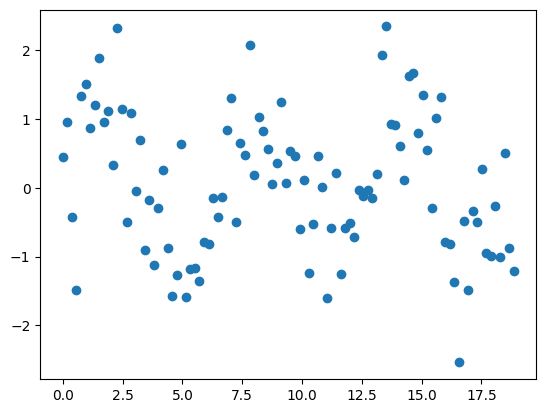

In [130]:
# plot da nova sequencia
plt.scatter(x_ex3, y_ex3)
plt.show()

In [131]:
inputs_ex3 = []
targets_ex3 = []

# preparacao dos dados
for i in range(num_points - sequence_length):
    inputs_ex3.append(y_ex3[i:i+sequence_length])
    targets_ex3.append(y_ex3[i+sequence_length])

inputs_ex3 = torch.tensor(inputs_ex3, dtype=torch.float32).unsqueeze(-1)
targets_ex3 = torch.tensor(targets_ex3, dtype=torch.float32).unsqueeze(-1)

In [138]:
# parametros
input_size = 1
hidden_size = 32
output_size = 1

# criacao da rede
rnn_ex3 = RNN(input_size, hidden_size, output_size)

# treinamento
rnn_ex3 = train_rnn(rnn_ex3, inputs_ex3, targets_ex3)

Epoch 0, Loss: 0.958971381187439
Epoch 50, Loss: 0.08549205958843231
Epoch 100, Loss: 0.005330003798007965
Epoch 150, Loss: 0.00011608163185883313
Epoch 200, Loss: 1.4893752222633339e-06
Epoch 250, Loss: 1.8730701434321873e-09
Epoch 300, Loss: 2.2735777747584507e-05
Epoch 350, Loss: 3.414117600186728e-05
Epoch 400, Loss: 6.855078282796967e-08
Epoch 450, Loss: 4.836207434522066e-09


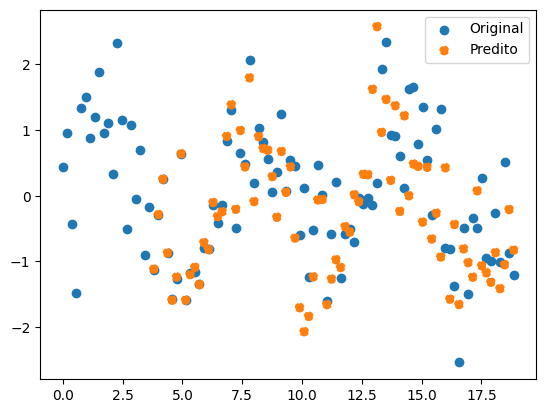

In [139]:
predict_wave(rnn_ex3, x_data=x_ex3, y_data=y_ex3, sequence_length=20)

Comparando a RNN inicial com a RNN dos dados com maior variação gaussiana, percebe-se que a rede não se adaptou muito bem aos dados. Além da arquitetura simples, a alta variação do padrão gera predições mais afastadas.

É possível que com o aumento do número de camadas de RNN o modelo se portaria melhor.